In [39]:
import pandas as pd, numpy as np, re, time
from nltk.stem.porter import PorterStemmer

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [40]:
# Loading data from json file
data = pd.read_csv("Cleaned_tweets.csv")

In [41]:
data.head(15)

,Unnamed: 0,Key Word,Username,User_ID,Datetime,Favorite_count,Geo,Coordinates,Label,Text
0,1515,ass,gametheoryosmer,1.330000e+18,11-11-2020 06:55,0,NaN,NaN,1,"my lieutenant called me a ""Pussy"" for not wipi..."
1,1167,bastard,oyibutter,1.330000e+18,11-11-2020 07:25,0,NaN,NaN,0,My fwb showed me pepper. I caught bastard feel...
2,115,Bad Fuck,Bigafterglow,1.330000e+18,11-11-2020 07:09,0,NaN,NaN,0,Oh fuck! What a bad tweet.
3,1740,bitch,ItsBillcosby,1.330000e+18,11-11-2020 07:27,0,NaN,NaN,1,If the dick fit suck it bitch 〽️™️
4,983,ass,SlayerOfWaifu,1.330000e+18,11-11-2020 06:55,1,NaN,NaN,0,If you think Fairy Tail is ass you do you 🤷🏽‍♂...
5,1520,ass,Rhodocrosite2,1.330000e+18,11-11-2020 06:55,0,NaN,NaN,1,her ass; a canvas
6,546,cunt,M_Loos,1.330000e+18,11-11-2020 09:44,0,NaN,NaN,0,Piers Morgan wants people who refuse to take t...
7,434,boobs,ajaxpenumbrabot,1.330000e+18,11-11-2020 08:00,0,NaN,NaN,0,"Hammetts on her hair, I had either-but boobs i..."
8,1259,bitch,MondeBlvck,1.330000e+18,11-11-2020 07:26,0,NaN,NaN,0,Bitch im cow!! i don't say moew🐮🗣️
9,1586,asslick,AlbertCarey8,1.330000e+18,08-11-2020 19:25,1,NaN,NaN,1,Just go away you asslick.


In [66]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

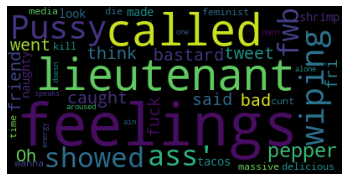

In [67]:
text = data['Text'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

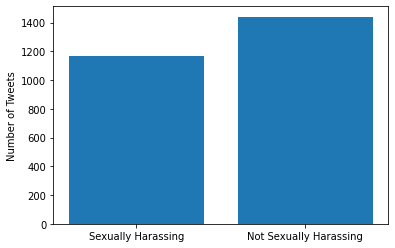

In [69]:
#Visualization
sh=0
for i in range(len(data["Label"])):
    if data["Label"].iloc[i]==1:
        sh+=1
normal=len(data["Label"])-sh
label_values={"Sexually Harassing" : sh, "Not Sexually Harassing" : normal}
plt.bar(label_values.keys(),label_values.values(),align="center")
plt.ylabel("Number of Tweets")
plt.show()

In [74]:
print("No. of Label 1 tweets")
print(len(data[data["Label"].isin([1])]))
print("No. of Label 0 tweets")
print(len(data[data["Label"].isin([0])]))
print("Class Balance Ratio")
print((len(data[data["Label"].isin([1])]))/len(data))

No. of Label 1 tweets
1171
No. of Label 0 tweets
1441
Class Balance Ratio
0.4483154670750383


In [42]:
# Getting features and labels
features = data['Text']
labels = data['Label']

In [43]:
# Stemming our data
ps = PorterStemmer()
features = features.apply(lambda x: x.split())
features = features.apply(lambda x : ' '.join([ps.stem(word) for word in x]))

In [44]:
# Vectorizing the data with maximum of 5000 features
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features = 5000)
features = list(features)
features = tv.fit_transform(features).toarray()

In [45]:
# Getting training and testing data
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.2, random_state = 0)

In [46]:
# Using linear support vector classifier
lsvc = LinearSVC()
# training the model
lsvc.fit(features_train, labels_train)
# getting the score of train and test data
print(lsvc.score(features_train, labels_train)) 
print(lsvc.score(features_test, labels_test))
y_pred = lsvc.predict(features_test)


0.9784585926280517
0.7571701720841301


In [47]:
from sklearn.metrics import f1_score
print(f1_score(labels_test, y_pred, average='macro'))
print(f1_score(labels_test, y_pred, average='micro'))
print(f1_score(labels_test, y_pred, average='weighted'))
print(f1_score(labels_test, y_pred, average=None))
print(f1_score(labels_test, y_pred, zero_division=1))

0.7539315894179581
0.7571701720841302
0.7558207626398917
[0.78216123 0.72570194]
0.7257019438444925


In [48]:
from sklearn.metrics import recall_score
print(recall_score(labels_test, y_pred, average='macro'))
print(recall_score(labels_test, y_pred, average='micro'))
print(recall_score(labels_test, y_pred, average='weighted'))
print(recall_score(labels_test, y_pred, average=None))
print(recall_score(labels_test, y_pred, average=None, zero_division=1))

0.7528644456196016
0.7571701720841301
0.7571701720841301
[0.8172043  0.68852459]
[0.8172043  0.68852459]


In [49]:
from sklearn.metrics import precision_score
print(precision_score(labels_test, y_pred, average='macro'))
print(precision_score(labels_test, y_pred, average='micro'))
print(precision_score(labels_test, y_pred, average='weighted'))
print(precision_score(labels_test, y_pred, average=None))
print(precision_score(labels_test, y_pred, average=None, zero_division=1))

0.7585616438356164
0.7571701720841301
0.7579886848791221
[0.75       0.76712329]
[0.75       0.76712329]


In [50]:
# Using Gaussuan Naive Bayes
gnb = GaussianNB()
gnb.fit(features_train, labels_train)
print(gnb.score(features_train, labels_train))  
print(gnb.score(features_test, labels_test))
y_pred = gnb.predict(features_test)

0.8879846816658689
0.6347992351816444


In [51]:
from sklearn.metrics import f1_score
print(f1_score(labels_test, y_pred, average='macro'))
print(f1_score(labels_test, y_pred, average='micro'))
print(f1_score(labels_test, y_pred, average='weighted'))
print(f1_score(labels_test, y_pred, average=None))
print(f1_score(labels_test, y_pred, zero_division=1))

0.633426909597989
0.6347992351816444
0.631925928490866
[0.61099796 0.65585586]
0.6558558558558559


In [52]:
from sklearn.metrics import recall_score
print(recall_score(labels_test, y_pred, average='macro'))
print(recall_score(labels_test, y_pred, average='micro'))
print(recall_score(labels_test, y_pred, average='weighted'))
print(recall_score(labels_test, y_pred, average=None))
print(recall_score(labels_test, y_pred, average=None, zero_division=1))

0.6417680239732064
0.6347992351816444
0.6347992351816444
[0.53763441 0.74590164]
[0.53763441 0.74590164]


In [53]:
from sklearn.metrics import precision_score
print(precision_score(labels_test, y_pred, average='macro'))
print(precision_score(labels_test, y_pred, average='micro'))
print(precision_score(labels_test, y_pred, average='weighted'))
print(precision_score(labels_test, y_pred, average=None))
print(precision_score(labels_test, y_pred, average=None, zero_division=1))

0.6463780865133775
0.6347992351816444
0.6504716198124749
[0.70754717 0.585209  ]
[0.70754717 0.585209  ]


In [54]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(features_train, labels_train)
print(lr.score(features_train, labels_train))  
print(lr.score(features_test, labels_test))
y_pred = lr.predict(features_test)

0.8736237434179033
0.7571701720841301


In [55]:
from sklearn.metrics import f1_score
print(f1_score(labels_test, y_pred, average='macro'))
print(f1_score(labels_test, y_pred, average='micro'))
print(f1_score(labels_test, y_pred, average='weighted'))
print(f1_score(labels_test, y_pred, average=None))
print(f1_score(labels_test, y_pred, zero_division=1))

0.7479556329663908
0.7571701720841302
0.7511807216575995
[0.79614767 0.69976359]
0.6997635933806147


In [56]:
from sklearn.metrics import recall_score
print(recall_score(labels_test, y_pred, average='macro'))
print(recall_score(labels_test, y_pred, average='micro'))
print(recall_score(labels_test, y_pred, average='weighted'))
print(recall_score(labels_test, y_pred, average=None))
print(recall_score(labels_test, y_pred, average=None, zero_division=1))

0.7477231329690346
0.7571701720841301
0.7571701720841301
[0.88888889 0.60655738]
[0.88888889 0.60655738]


In [57]:
from sklearn.metrics import precision_score
print(precision_score(labels_test, y_pred, average='macro'))
print(precision_score(labels_test, y_pred, average='micro'))
print(precision_score(labels_test, y_pred, average='weighted'))
print(precision_score(labels_test, y_pred, average=None))
print(precision_score(labels_test, y_pred, average=None, zero_division=1))

0.77387293750812
0.7571701720841301
0.770329926660607
[0.72093023 0.82681564]
[0.72093023 0.82681564]


In [58]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators = 10, random_state = 0)
rfc.fit(features_train, labels_train)
print(rfc.score(features_train, labels_train)) 
print(rfc.score(features_test, labels_test))
y_pred = lr.predict(features_test)

0.9784585926280517
0.7112810707456979


In [59]:
from sklearn.metrics import f1_score
print(f1_score(labels_test, y_pred, average='macro'))
print(f1_score(labels_test, y_pred, average='micro'))
print(f1_score(labels_test, y_pred, average='weighted'))
print(f1_score(labels_test, y_pred, average=None))
print(f1_score(labels_test, y_pred, zero_division=1))

0.7479556329663908
0.7571701720841302
0.7511807216575995
[0.79614767 0.69976359]
0.6997635933806147


In [60]:
from sklearn.metrics import recall_score
print(recall_score(labels_test, y_pred, average='macro'))
print(recall_score(labels_test, y_pred, average='micro'))
print(recall_score(labels_test, y_pred, average='weighted'))
print(recall_score(labels_test, y_pred, average=None))
print(recall_score(labels_test, y_pred, average=None, zero_division=1))

0.7477231329690346
0.7571701720841301
0.7571701720841301
[0.88888889 0.60655738]
[0.88888889 0.60655738]


In [61]:
from sklearn.metrics import precision_score
print(precision_score(labels_test, y_pred, average='macro'))
print(precision_score(labels_test, y_pred, average='micro'))
print(precision_score(labels_test, y_pred, average='weighted'))
print(precision_score(labels_test, y_pred, average=None))
print(precision_score(labels_test, y_pred, average=None, zero_division=1))

0.77387293750812
0.7571701720841301
0.770329926660607
[0.72093023 0.82681564]
[0.72093023 0.82681564]


In [62]:
#Linear Support Vector Classifier
from sklearn import svm
lin_clf = svm.LinearSVC()
lin_clf.fit(features_train, labels_train)
print(lin_clf.score(features_train, labels_train)) 
print(lin_clf.score(features_test, labels_test))
y_pred = lr.predict(features_test)

0.9784585926280517
0.7571701720841301


In [63]:
from sklearn.metrics import f1_score
print(f1_score(labels_test, y_pred, average='macro'))
print(f1_score(labels_test, y_pred, average='micro'))
print(f1_score(labels_test, y_pred, average='weighted'))
print(f1_score(labels_test, y_pred, average=None))
print(f1_score(labels_test, y_pred, zero_division=1))

0.7479556329663908
0.7571701720841302
0.7511807216575995
[0.79614767 0.69976359]
0.6997635933806147


In [64]:
from sklearn.metrics import recall_score
print(recall_score(labels_test, y_pred, average='macro'))
print(recall_score(labels_test, y_pred, average='micro'))
print(recall_score(labels_test, y_pred, average='weighted'))
print(recall_score(labels_test, y_pred, average=None))
print(recall_score(labels_test, y_pred, average=None, zero_division=1))

0.7477231329690346
0.7571701720841301
0.7571701720841301
[0.88888889 0.60655738]
[0.88888889 0.60655738]


In [65]:
from sklearn.metrics import precision_score
print(precision_score(labels_test, y_pred, average='macro'))
print(precision_score(labels_test, y_pred, average='micro'))
print(precision_score(labels_test, y_pred, average='weighted'))
print(precision_score(labels_test, y_pred, average=None))
print(precision_score(labels_test, y_pred, average=None, zero_division=1))

0.77387293750812
0.7571701720841301
0.770329926660607
[0.72093023 0.82681564]
[0.72093023 0.82681564]
